<a href="https://colab.research.google.com/github/MohuaSinha/EVA4/blob/master/S11/S11_Solution_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd "//content/gdrive/My Drive/Colab Notebooks/EVA4/Mou_Library"
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Mou_Library'
sys.path.append(workingdir)

/content/gdrive/My Drive/Colab Notebooks/EVA4/Mou_Library


In [3]:
ls-ltr

total 1492
drwx------ 2 root root   4096 Mar 14 15:38 data/
drwx------ 2 root root   4096 Mar 19 07:16 __pycache__/
-rw------- 1 root root    791 Apr  4 20:51 displayimages.py
-rw------- 1 root root   2515 Apr  4 20:51 showimages.py
-rw------- 1 root root   1777 Apr  4 20:51 utils.py
-rw------- 1 root root   6998 Apr  4 20:51 train_test.py
-rw------- 1 root root   1125 Apr  4 20:51 plotresults.py
-rw------- 1 root root  19174 Apr  4 20:51 lr_finder.py
-rw------- 1 root root   9276 Apr  4 20:51 dnnmodel.py
-rw------- 1 root root   2826 Apr  5 14:38 gradcam.py
-rw------- 1 root root   3793 Apr  5 19:04 grad_visualize.py
-rw------- 1 root root  35667 Apr  5 20:28 gradcam_incorrect_0_tplane_ptruck.png
-rw------- 1 root root  39075 Apr  5 20:28 gradcam_incorrect_4_tbird_pplane.png
-rw------- 1 root root  38528 Apr  5 20:28 gradcam_incorrect_3_tbird_pcat.png
-rw------- 1 root root  40367 Apr  5 20:28 gradcam_incorrect_2_tplane_pbird.png
-rw------- 1 root root  42045 Apr  5 20:28 gradcam_inco


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [4]:
#!pip install import-ipynb
#import import_ipynb
#from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR,OneCycleLR


%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from config import ModelConfig
import os

#Below are the created modules
import dnnmodel
import custom_resnet
import train_test
import datatransformation 
import showimages
import displayimages
import  gradcam 
import grad_visualize 
import lr_finder
import lr_range_test
from clr import CyclicLR
from utils import *
import plotresults
from torch.optim.lr_scheduler import StepLR

  pip install torch-lr-finder -v --global-option="amp"


**Model Configuration and set SEED**

In [5]:
#### View model config
args = ModelConfig()
args.print_config()

print()
#### Set seed
#init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 512,
  'batch_size_cuda': 512,
  'dropout': 0,
  'epochs': 24,
  'l1_decay': 3e-06,
  'l2_decay': 0.001,
  'lr': 0.001,
  'momentum': 0.9,
  'num_workers': 4,
  'seed': 1}



The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
#train_transforms,test_transforms= datatransformation.load()
train_transforms , test_transforms=datatransformation.AlbumentationWrapper('train'), datatransformation.AlbumentationWrapper('test')

In [7]:
classes,trainloader, testloader = datatransformation.dataloaders(1, 512, 10, train_transforms , test_transforms)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



shape: torch.Size([512, 3, 32, 32])
  cat truck truck   cat   cat


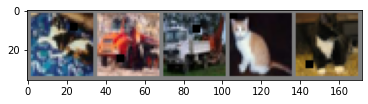

In [8]:
displayimages.show_random_image(trainloader,classes)

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [9]:
!pip install torchsummary
from torchsummary import summary

device = which_device()
model = custom_resnet.NetCifar10()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
print(model.device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
        LayerBlock-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1,

**LR FINDER**


Learning rate search finished. See the graph with {finder_name}.plot()


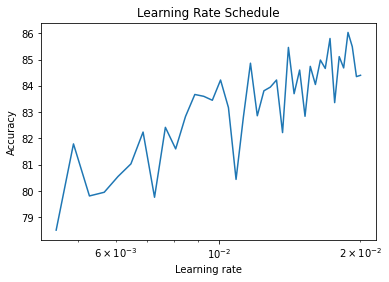

In [10]:
#criterion = nn.CrossEntropyLoss()
weight_decay = 5e-4

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
lr_finder = lr_range_test.LRRangeFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, testloader, start_lr=1e-4, end_lr=0.02,epochs=50, step_mode="linear")
lr_finder.plot(metric='acc', skip_start=10, skip_end=0)
lr_finder.reset()

In [11]:
best_acc = lr_finder.best_acc
best_loss = lr_finder.best_loss
best_lr = lr_finder.history["lr"][lr_finder.history["acc"].index(best_acc)]
print("Best Accuracy: %s\nBest Learning Rate: %s" % (best_acc, best_lr))
print("Best Loss: %s" % (best_loss))
args.lr = best_lr

Best Accuracy: 86.03
Best Learning Rate: 0.018810061224489794
Best Loss: 0.001105083116889


In [12]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
criterion = nn.CrossEntropyLoss()

from torch.optim.lr_scheduler import ReduceLROnPlateau

#initial_lr = 0.001
max_lr = best_lr
min_lr = max_lr * 0.01

EPOCHS = 24
steps_per_epoch = len(trainloader)
num_steps = steps_per_epoch * EPOCHS
peak_lr_epoch = 5 
pct_start = float (peak_lr_epoch/EPOCHS)
div_factor = float (max_lr/initial_lr)
final_div_factor = float (initial_lr/min_lr)

print("maxlr: ", max_lr)
print("epochs: ", EPOCHS)
print("steps_per_epoch: ", steps_per_epoch)
print("pct_start: ", pct_start)
print("div_factor: ", div_factor)
print("final_div_factor: ", final_div_factor)

#torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, total_steps=None, epochs=None, steps_per_epoch=None, pct_start=0.3, anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=25.0, final_div_factor=10000.0, last_epoch=-1)

optimizer = optim.SGD(model.parameters(), lr=max_lr, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
#scheduler = OneCycleLR(optimizer, max_lr=best_lr, steps_per_epoch=len(trainloader),epochs=args.epochs, div_factor=10, final_div_factor=1,
                      # pct_start=5/args.epochs, anneal_strategy="linear")

scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr, 
                                                epochs=EPOCHS, 
                                                steps_per_epoch=steps_per_epoch, 
                                                pct_start=pct_start, 
                                                anneal_strategy='cos', 
                                                cycle_momentum=True, 
                                                base_momentum=0.85, 
                                                max_momentum=0.95, 
                                                div_factor=div_factor, 
                                                final_div_factor=final_div_factor, 
                                                last_epoch=-1)


input_size=(3,32,32)

maxlr:  0.018810061224489794
epochs:  24
steps_per_epoch:  98
pct_start:  0.20833333333333334
div_factor:  18.810061224489793
final_div_factor:  5.3163038018081945


In [0]:
def run(l1_decay=0.0, l2_decay=0.0):
  train_losses=[]
  test_losses = []
  train_accs=[]
  test_accs = []
  misclassified_imgs = []
  correct_imgs = []
  LR_list = []
  EPOCHS = 24
  #args.epochs
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch,'LR:',optimizer.param_groups[0]['lr'])
      LR_list.append(optimizer.param_groups[0]['lr'])
      train_test.train(model, device, trainloader, optimizer,scheduler, epoch,False,best_loss)
      train_test.test(model, device, testloader,criterion, classes, test_losses, test_accs,misclassified_imgs,correct_imgs,epoch==args.epochs-1)        
      #scheduler.step()
  return train_losses, train_accs, test_losses, test_accs, misclassified_imgs,correct_imgs

In [14]:
# train and test the model
train_losses, train_accs, test_losses, test_accs, misclassified_imgs,correct_imgs = run(l1_decay=args.l1_decay, l2_decay=args.l2_decay)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0 LR: 0.0010000000000000009


Loss=1.2165488004684448 Batch_id=97 Accuracy=38.87: 100%|██████████| 98/98 [00:16<00:00,  5.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0027, Accuracy: 5130/10000 (51.30%)

EPOCH: 1 LR: 0.0010000000000000009


Loss=1.0275472402572632 Batch_id=97 Accuracy=58.79: 100%|██████████| 98/98 [00:17<00:00,  5.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0022, Accuracy: 6103/10000 (61.03%)

EPOCH: 2 LR: 0.0010000000000000009


Loss=0.8926119208335876 Batch_id=97 Accuracy=66.68: 100%|██████████| 98/98 [00:17<00:00,  5.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0019, Accuracy: 6647/10000 (66.47%)

EPOCH: 3 LR: 0.0010000000000000009


Loss=0.7613595724105835 Batch_id=97 Accuracy=72.71: 100%|██████████| 98/98 [00:16<00:00,  5.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0016, Accuracy: 7274/10000 (72.74%)

EPOCH: 4 LR: 0.0010000000000000009


Loss=0.7288141250610352 Batch_id=97 Accuracy=76.54: 100%|██████████| 98/98 [00:17<00:00,  5.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0015, Accuracy: 7352/10000 (73.52%)

EPOCH: 5 LR: 0.0010000000000000009


Loss=0.5761538743972778 Batch_id=97 Accuracy=79.73: 100%|██████████| 98/98 [00:16<00:00,  5.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0014, Accuracy: 7581/10000 (75.81%)

EPOCH: 6 LR: 0.0010000000000000009


Loss=0.5168728828430176 Batch_id=97 Accuracy=82.39: 100%|██████████| 98/98 [00:16<00:00,  5.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0013, Accuracy: 7696/10000 (76.96%)

EPOCH: 7 LR: 0.0010000000000000009


Loss=0.5375475883483887 Batch_id=97 Accuracy=84.40: 100%|██████████| 98/98 [00:17<00:00,  5.58it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0013, Accuracy: 7733/10000 (77.33%)

EPOCH: 8 LR: 0.0010000000000000009


Loss=0.375832736492157 Batch_id=97 Accuracy=86.60: 100%|██████████| 98/98 [00:16<00:00,  5.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0013, Accuracy: 7849/10000 (78.49%)

EPOCH: 9 LR: 0.0010000000000000009


Loss=0.352876752614975 Batch_id=97 Accuracy=88.58: 100%|██████████| 98/98 [00:17<00:00,  5.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0013, Accuracy: 7860/10000 (78.60%)

EPOCH: 10 LR: 0.0010000000000000009


Loss=0.3377980589866638 Batch_id=97 Accuracy=90.32: 100%|██████████| 98/98 [00:17<00:00,  5.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0013, Accuracy: 7869/10000 (78.69%)

EPOCH: 11 LR: 0.0010000000000000009


Loss=0.22253639996051788 Batch_id=97 Accuracy=91.57: 100%|██████████| 98/98 [00:16<00:00,  5.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8033/10000 (80.33%)

EPOCH: 12 LR: 0.0010000000000000009


Loss=0.23114490509033203 Batch_id=97 Accuracy=93.18: 100%|██████████| 98/98 [00:17<00:00,  5.58it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8027/10000 (80.27%)

EPOCH: 13 LR: 0.0010000000000000009


Loss=0.22670212388038635 Batch_id=97 Accuracy=94.32: 100%|██████████| 98/98 [00:17<00:00,  5.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8101/10000 (81.01%)

EPOCH: 14 LR: 0.0010000000000000009


Loss=0.2033953219652176 Batch_id=97 Accuracy=95.41: 100%|██████████| 98/98 [00:17<00:00,  5.59it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8099/10000 (80.99%)

EPOCH: 15 LR: 0.0010000000000000009


Loss=0.2168342024087906 Batch_id=97 Accuracy=95.93: 100%|██████████| 98/98 [00:17<00:00,  5.55it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8156/10000 (81.56%)

EPOCH: 16 LR: 0.0010000000000000009


Loss=0.12000972032546997 Batch_id=97 Accuracy=96.71: 100%|██████████| 98/98 [00:17<00:00,  5.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0011, Accuracy: 8206/10000 (82.06%)

EPOCH: 17 LR: 0.0010000000000000009


Loss=0.11560574173927307 Batch_id=97 Accuracy=97.03: 100%|██████████| 98/98 [00:16<00:00,  5.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8159/10000 (81.59%)

EPOCH: 18 LR: 0.0010000000000000009


Loss=0.09700611978769302 Batch_id=97 Accuracy=97.64: 100%|██████████| 98/98 [00:17<00:00,  5.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8148/10000 (81.48%)

EPOCH: 19 LR: 0.0010000000000000009


Loss=0.06512552499771118 Batch_id=97 Accuracy=98.18: 100%|██████████| 98/98 [00:16<00:00,  5.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0011, Accuracy: 8259/10000 (82.59%)

EPOCH: 20 LR: 0.0010000000000000009


Loss=0.0668310821056366 Batch_id=97 Accuracy=98.51: 100%|██████████| 98/98 [00:17<00:00,  5.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8240/10000 (82.40%)

EPOCH: 21 LR: 0.0010000000000000009


Loss=0.06080537661910057 Batch_id=97 Accuracy=98.81: 100%|██████████| 98/98 [00:16<00:00,  5.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8227/10000 (82.27%)

EPOCH: 22 LR: 0.0010000000000000009


Loss=0.05243554711341858 Batch_id=97 Accuracy=98.86: 100%|██████████| 98/98 [00:16<00:00,  5.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.0012, Accuracy: 8250/10000 (82.50%)

EPOCH: 23 LR: 0.0010000000000000009


Loss=0.04729399085044861 Batch_id=97 Accuracy=99.17: 100%|██████████| 98/98 [00:16<00:00,  5.79it/s]


Test set: Average loss: 0.0012, Accuracy: 8279/10000 (82.79%)



3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:    cat   car   car truck   cat
Predicted:   deer   car   car truck   cat


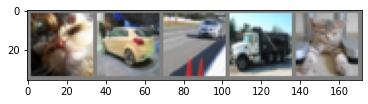

In [15]:
showimages.show_predicted_actual(model, device, testloader, classes)

Okay, now let us see what the neural network thinks these examples above are:



The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



## **Visualize GradCAM**

Use GradCAM to understand where the network is looking at while prediction

In [16]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = grad_visualize.VisualizeCam(model,classes, target_layers)
print (viz_cam)

In [17]:
#len(testloader.dataset)
print(misclassified_imgs[0]["img"])

tensor([[[ 0.1686, -0.0039,  0.2706,  ...,  0.4118,  0.2000, -0.0275],
         [ 0.1922,  0.0902,  0.2627,  ...,  0.3333,  0.1843, -0.0824],
         [ 0.0902,  0.0902,  0.2392,  ...,  0.1922,  0.0667, -0.2235],
         ...,
         [-0.4588, -0.4588, -0.4588,  ..., -0.6941, -0.5373, -0.6235],
         [-0.4980, -0.4588, -0.4824,  ..., -0.5922, -0.5137, -0.5922],
         [-0.5373, -0.4667, -0.4588,  ..., -0.5765, -0.5529, -0.5216]],

        [[ 0.4275,  0.2078,  0.5216,  ...,  0.5294,  0.2941,  0.0667],
         [ 0.4510,  0.3176,  0.5059,  ...,  0.3882,  0.2627,  0.0039],
         [ 0.3255,  0.3098,  0.4588,  ...,  0.2000,  0.1137, -0.1765],
         ...,
         [-0.6000, -0.6078, -0.6078,  ..., -0.6392, -0.5294, -0.5765],
         [-0.6471, -0.6078, -0.6392,  ..., -0.5529, -0.4824, -0.5294],
         [-0.6941, -0.6157, -0.6078,  ..., -0.5451, -0.5059, -0.4667]],

        [[ 0.6941,  0.5216,  0.7490,  ...,  0.6549,  0.4275,  0.2157],
         [ 0.7333,  0.6392,  0.8039,  ...,  0

In [18]:
#GradCam for incorrectly classified images

num_img = 5
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
  #incorrect_pred_imgs
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect")


KeyError: ignored

In [0]:
num_img = 25
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect", per_image=False)

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [19]:
showimages.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 82 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [20]:
showimages.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 80 %
Accuracy of   car : 100 %
Accuracy of  bird : 66 %
Accuracy of   cat : 50 %
Accuracy of  deer : 66 %
Accuracy of   dog : 57 %
Accuracy of  frog : 90 %
Accuracy of horse : 100 %
Accuracy of  ship : 75 %
Accuracy of truck : 100 %


## **Plot Validation Accuracy**
Plot the change in validation accracy vs epochs

In [0]:
plt_data = {
    "train": train_accs,
    "val": test_accs
}
plotresults.plot_graph(plt_data, "Accuracy")